## IKEA PROJECT

IKEA stores are already available in the following municipalities: Borlänge, Gävle, Göteborg, Haparanda, Helsingborg, Jönköping, Kalmar, Karlstad, Linköping, Malmö, Stockholm, Sundsvall, Uddevalla, Umeå, Uppsala, Västerås, Älmhult, and Örebro. 
The purpose of this project is to discover some new places in Sweden that may be suitable for IKEA department stores by using K-means method.

#### Reading and processing the dataset

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_file = 'ikea.txt'

data = pd.read_csv(data_file, delimiter = "\t")

data= pd.DataFrame(data)


In [85]:
print(data.dtypes)

Kommun_code                int64
Year                       int64
Kommun_name               object
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
Infrast                    int64
Border                     int64
dtype: object


The dataset was provided by Dalarna University as part of a project. The different variables included are:
Kommun_code: categorical variable coding the municipality
Year: year of the observation
Kommun_name: name of the municipality
Revenue:
Employee:
Population: total population
Population_University: students population
Percent_University: percentage of the population that are students
Productivity:
SalesIndex:
Infrast:
Border: whether the municipality lies near the frontier


In [86]:
data.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


From the basic statistical analysis of these columns we can appreciate different things:

* There are no missing data, all the columns have 207 observations. 
* The Kommun_code should be categorical, as should be the last two dummy variables: border and infraestructure.
* All the observations are from the same year
* Productivity is the one with the lesser coefficient of variation, all the others having such a coefficient roughly between 2 and 3.


In [88]:
data.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [125]:
#Changing datatypes to avoid treating categorical data as numeric
data.Kommun_code = data.Kommun_code.astype(str)
data.Border = data.Border.astype(str)
data.Infrast = data.Infrast.astype(str)

Since the aim of the project is to find potential locations for IKEA store, we keep the variables that are relevant to the topic.

In [126]:
cols = ['Revenue','Employee','Population','Population_University','Percent_University','Productivity','SalesIndex']
cities = data['Kommun_name']
num_data = data[cols]

In [130]:
#import necessary libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA



In order for the K-means algorithm to perform better we scale the data.

In [129]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_data)
scaled_data.shape

(207, 7)

We perform PCA and keep the principal components that explain 95% of the variance in the data.

In [131]:
#95% of variance
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

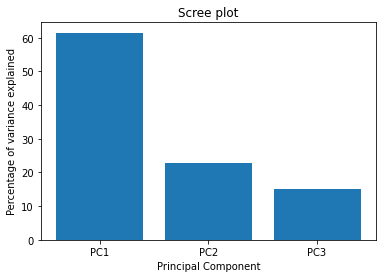

In [132]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal Component')

plt.title('Scree plot')
plt.show()

In [95]:
print(per_var)

[61.5 22.7 15.2]


The first three principal components explain 99.4% of the variance.

In [133]:
pca_df=pd.DataFrame(pca_data,columns=labels, index = cities)
pca_df.head()


,PC1,PC2,PC3
Kommun_name,,,
Haparanda,-0.076501,0.129303,0.398116
Kalmar,0.227785,-0.016208,0.092677
Karlstad,0.316690,-0.028422,0.098735
Upplands Väsby,0.061061,-0.030628,0.022449
Vallentuna,0.071535,-0.122667,-0.003965


In [98]:
loading_scores = pd.Series(pca.components_[0],index = cols )
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

print(sorted_loading_scores)

Percent_University       0.731203
Revenue                  0.313960
SalesIndex               0.313960
Population               0.307627
Employee                 0.292040
Population_University    0.290000
Productivity             0.064644
dtype: float64


From analyzing the loading scores of the PCA we can see that the variables most relevant for the analysis are the ratio of university popularion, the revenue and sales index.

To visualize possible clusters we create a scatter plot of the first two principal components.

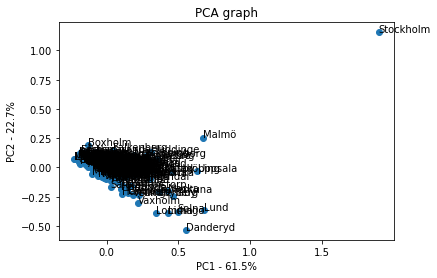

In [97]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    
plt.show()

Stockholm clearly stands out from the rest of the municipalities, but apart from that no clear cluster can be seen. Next we will instantiate the KMeans algorithm.

#### KMeans

In [99]:
from sklearn.cluster import KMeans

In [100]:
pca_df1 = pca_df


In [101]:
pca_df1.head()

,PC1,PC2,PC3
Kommun_name,,,
Haparanda,-0.076501,0.129303,0.398116
Kalmar,0.227785,-0.016208,0.092677
Karlstad,0.316690,-0.028422,0.098735
Upplands Väsby,0.061061,-0.030628,0.022449
Vallentuna,0.071535,-0.122667,-0.003965


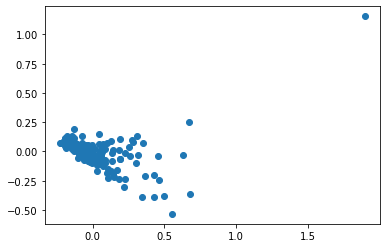

In [102]:
plt.scatter(pca_df1['PC1'],pca_df1['PC2'])

In [103]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_df1)
    distortions.append(kmeanModel.inertia_)

C:\Users\Magui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


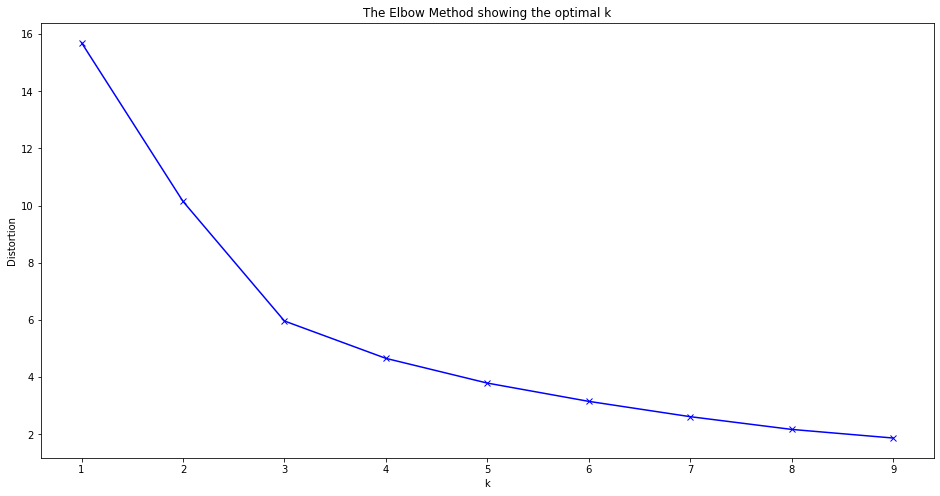

In [104]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the elbow plot it can be seen that 3 would be the optimal number of clusters to include in our analysis.

In [105]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df1)

KMeans(n_clusters=3)

In [106]:
print(kmeans.cluster_centers_)


[[ 0.29122637 -0.11953416  0.02541574]
 [-0.07495538  0.01933637 -0.00354438]
 [ 1.89208346  1.15491757 -0.34138265]]


In [107]:
print(kmeans.labels_)


[1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 2 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


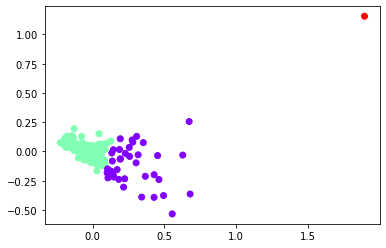

In [108]:
plt.scatter(pca_df1['PC1'],pca_df1['PC2'], c=kmeans.labels_, cmap='rainbow')


From the three clusters obtained, one only contains Stockholm, as was expected.

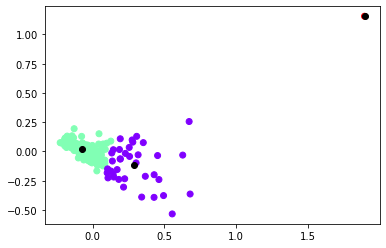

In [109]:
plt.scatter(pca_df1['PC1'],pca_df1['PC2'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [110]:
data['clusters'] = kmeans.labels_

In [111]:
data.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,1
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1


We introduce the list of all the municipalities that already have an IKEA store.

In [112]:
has_Ikea = ['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö', 'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 'Västerås', 'Älmhult', 'Örebro']

In [113]:
data_a = data


In [114]:
data_a.set_index('Kommun_name')

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
Kommun_name,,,,,,,,,,,,
Haparanda,2583,2010,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1
Kalmar,880,2010,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0
Karlstad,1780,2010,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0
Upplands Väsby,114,2010,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,1
Vallentuna,115,2010,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1
Österåker,117,2010,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,1
Värmdö,120,2010,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,1
Järfälla,123,2010,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,0
Ekerö,125,2010,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,0


A new variable is created denoting whether a municipality has an IKEA store or not.

In [115]:
data_a['has_ikea'] = np.where(data_a['Kommun_name'].isin(has_Ikea), 1, 0)


In [116]:
data_a.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,1,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,1,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1,0


Next we try to understand the clusters in terms of the original variables

C:\Users\Magui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 55000.0)

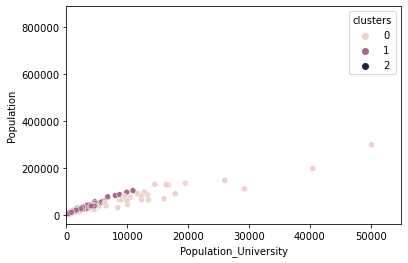

In [117]:
sns.scatterplot(data_a['Population_University'],data_a['Population'],hue=data_a['clusters'], data=data_a.loc[data_a['has_ikea']=='1'])
plt.xlim(0,55000)

C:\Users\Magui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 55000.0)

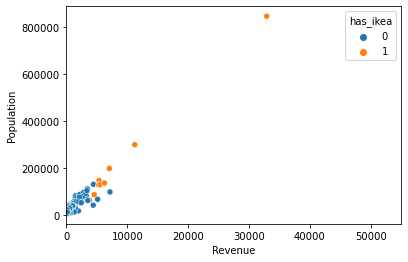

In [118]:
sns.scatterplot(data_a['Revenue'],data_a['Population'],hue=data_a['has_ikea'], data=data_a)
plt.xlim(0,55000)

As was expected the population plays a major role in determining the municipalities with IKEA stores.

In [119]:
data_a.groupby('clusters').has_ikea.value_counts()


clusters  has_ikea
0         0            29
          1             8
1         0           166
          1             3
2         1             1
Name: has_ikea, dtype: int64

C:\Users\Magui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 55000.0)

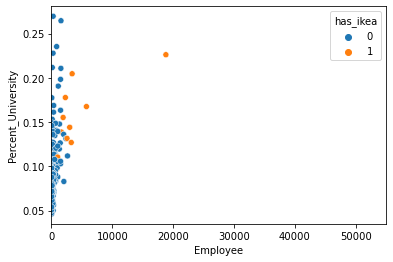

In [120]:
sns.scatterplot(data_a['Employee'],data_a['Percent_University'],hue=data_a['has_ikea'], data=data_a)
plt.xlim(0,55000)

Even if the meaning of the variable employee is not clear, it can be seen that the municipalities with higher values in this variable tend to have IKEA stores.

C:\Users\Magui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 55000.0)

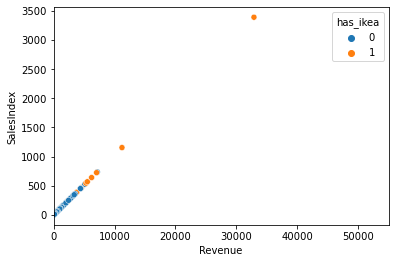

In [121]:
sns.scatterplot(data_a['Revenue'],data_a['SalesIndex'],hue=data_a['has_ikea'], data=data_a)
plt.xlim(0,55000)


In [122]:
data_sorted = data_a.sort_values('Population', ascending=False).sort_values('SalesIndex', ascending=False).sort_values('Revenue', ascending=False).sort_values('Employee', ascending=False)

<AxesSubplot:>

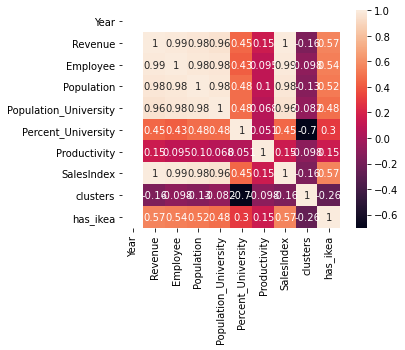

In [123]:
sns.heatmap(data_sorted.corr(), square=True, annot=True)

When analyzing where the already existing IKEA stores were located, it can
be seen that the variables that are the most correlated to having an IKEA store are sales index,
revenue, population, and employees,

In [124]:
pd.set_option('display.max_rows', None)

data_sorted

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters,has_ikea
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.71780,3389.665819,1,0,2,1
117,1280,2010,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,0,1
33,380,2010,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.598890,0,0,0,1
120,1283,2010,Helsingborg,5528,3244,129177,16395,0.126919,85.40061,569.598220,1,0,0,1
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,0,1
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,0,0
64,680,2010,Jönköping,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,0,1
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,0,0
52,580,2010,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,0,1
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,1,0


With this information, the analysis will proceed by means of mapping the municipalities without IKEA
that scored the most in these variables. The first 5 candidates were: Norrköping, Huddinge,
Falkenberg, Järfälla, Lund, Täby, Nacka, Mölndal and Borås. When setting them all on a map, as can
be seen in Figure 2, three of them are in close distance of Stockholm, Huddinge, Täby and Järfälla.
Figure 1: Heatmap - Has Ikea
Since they are withing short distance of a major IKEA setting, we believe it would not be greatly
beneficial to set up a shop there, since it is likely that the possible customers living in those areas are
already shopping at Stockholm’s IKEA stores.

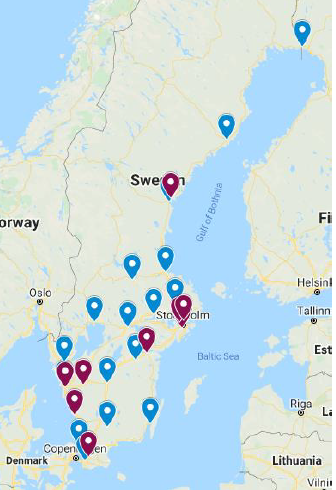

The locations that are further away from IKEA stores and that have good ratings for all the relevant
variables are Norrköping, Falkenberg and Borås. The first two of them were the best suited options
without regard to closeness to other IKEA stores. Thus, our recommendation would be to further
analyze the possibility of opening a new store in one of these three locations.